# Experiment Report

In [2]:
import os
import numpy as np
np.warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [3]:
root = "/mnt/storage/log-experiments/"
results_path = "results/focus_sharing_multiple_agents/"
experiments = [f for f in os.listdir(root+results_path) if f[-4:] == 'json']
results = {}
for exp in experiments:
    exp_name = exp[:-5]
    try:
        with open( root+ results_path + exp, 'r') as f:
            results[exp_name] = json.load(f)
    except:
        pass


In [4]:
experiments

['dqn_focus_sharing_10.json',
 'dqn_focus_sharing_3.json',
 'dqn_focus_sharing_4.json',
 'dqn_focus_sharing_5.json',
 'dqn_focus_sharing_6.json',
 'dqn_focus_sharing_7.json',
 'dqn_focus_sharing_8.json',
 'dqn_focus_sharing_9.json']

In [5]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = results[exp_name]['episodes_to_complete']

In [6]:
for key, data in episode_count.items():
    print("{}: {}".format(key, sorted(data).count(1000)))

dqn_focus_sharing_10: 0
dqn_focus_sharing_3: 0
dqn_focus_sharing_4: 1
dqn_focus_sharing_5: 0
dqn_focus_sharing_6: 0
dqn_focus_sharing_7: 0
dqn_focus_sharing_8: 0
dqn_focus_sharing_9: 0


In [7]:
episode_count

{'dqn_focus_sharing_10': [222,
  123,
  153,
  157,
  135,
  170,
  126,
  136,
  153,
  158,
  102,
  128,
  116,
  95,
  121,
  112,
  107,
  114,
  114,
  86,
  254,
  179,
  197,
  204,
  182,
  117,
  170,
  180,
  175,
  137,
  121,
  108,
  98,
  141,
  93,
  141,
  101,
  83,
  121,
  109,
  115,
  134,
  169,
  173,
  618,
  185,
  169,
  185,
  185,
  165,
  225,
  118,
  118,
  114,
  111,
  177,
  134,
  169,
  154,
  112,
  99,
  122,
  117,
  137,
  114,
  119,
  130,
  129,
  114,
  168,
  146,
  160,
  174,
  184,
  156,
  137,
  172,
  146,
  185,
  177,
  88,
  100,
  90,
  93,
  88,
  108,
  97,
  98,
  90,
  95,
  107,
  115,
  113,
  90,
  113,
  80,
  107,
  90,
  93,
  114],
 'dqn_focus_sharing_3': [83,
  95,
  104,
  113,
  110,
  123,
  261,
  135,
  318,
  160,
  270,
  149,
  88,
  82,
  211,
  101,
  116,
  102,
  90,
  100,
  92,
  101,
  93,
  101,
  132,
  135,
  160,
  224,
  209,
  100,
  164,
  235,
  120,
  95,
  103,
  89,
  115,
  118,
  106,
  94,


In [8]:
print("means")
for k,v in episode_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(np.std(v))


means
139.24
142.49019607843138
121.98
118.31
124.73529411764706
111.62857142857143
129.81730769230768
113.19444444444444

deviations
60.069979190940295
89.46307652180236
101.35245236302869
39.03503426410691
46.63246501677716
29.647213678718018
37.90696212263473
25.188349134049364


I could remove the 10 , and it would make a nice curve to extrapolate. But the others don't make a lot of sense either. I will add the new samples I get from the new experiments, and them compare. 

In [9]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = results[exp_name]['average_steps']

In [10]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
56.14429417790223
66.77947232597121
63.86651689090243
60.19430909039058
61.2538862036287
55.366525395051326
57.124264193389976
57.455667050896146

deviations
19.60080304829497
25.788381329792806
20.96236971288403
17.599970661039656
21.768238875857527
14.87796259910464
19.504736619488003
19.999204964211472


In [11]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = results[exp_name]['average_rewards']

In [12]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
56.14429417790223
66.77947232597121
63.86651689090243
60.19430909039058
61.2538862036287
55.366525395051326
57.124264193389976
57.455667050896146

deviations
19.60080304829497
25.788381329792806
20.96236971288403
17.599970661039656
21.768238875857527
14.87796259910464
19.504736619488003
19.999204964211472


In [13]:
experiments

['dqn_focus_sharing_10.json',
 'dqn_focus_sharing_3.json',
 'dqn_focus_sharing_4.json',
 'dqn_focus_sharing_5.json',
 'dqn_focus_sharing_6.json',
 'dqn_focus_sharing_7.json',
 'dqn_focus_sharing_8.json',
 'dqn_focus_sharing_9.json']

In [15]:
results.keys()

dict_keys(['dqn', 'dqn_focus_sharing', 'dqn_prio', 'dqn_prio_focus_sharing', 'dqn_prio_sharing', 'dqn_sharing'])

In [16]:
experiments_labels = {
    'dqn_sharing': 'DQN + Regular ES',
    'dqn_prio_sharing': 'DQN + Prioritized ES', 
    'dqn_prio_focus_sharing': 'DQN + Prioritized Focused ES', 
    'dqn_focus_sharing': 'DQN + Focused ES', 
    'dqn': 'DQN',
    'dqn_prio': 'DQN w/ Priority Replay',
}

In [17]:
def plot(results, selected_experiments, colors):
    plt.figure(figsize=(10,4))
    # plt.xticks(np.arange(0,300000,50000))
    plt.xgrid(True)
    for exp_id, color in zip(selected_experiments, colors):
        # exp_label = experiments[exp_name]
        sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes")
    plt.xlim((0,1000))

    # plt.ylim(0, 0.06)
        


In [18]:
colors = ['#003FFF', '#03ED3A', '#E8000B']

In [19]:
# dir(plt.rcParams)

In [20]:
# format plots
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.75})


In [21]:
def plot_single(results, selected_experiments, colors):
    plt.figure(figsize=(10,5))
    # plt.xticks(np.arange(0,300000,50000))
    plt.grid(axis='y')
    for exp_id, color in zip(selected_experiments, colors):
        # exp_label = experiments[exp_name]
        sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes")
    plt.xlim((0,1000))

    # plt.ylim(0, 0.06)
        


In [22]:
def plot_multi(results, combinations, colors):
    # https://matplotlib.org/examples/pylab_examples/subplots_demo.html
    
    f, axes = plt.subplots(len(combinations), 1, sharex=True, figsize=(10,10))
    f.subplots_adjust(hspace=0.1)

    for idx, comb in enumerate(combinations):
        for exp_id, color in zip(comb, colors):
            sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color, ax=axes[idx], kde=True)

            axes[idx].xaxis.grid(True)
            axes[idx].yaxis.grid(False)
            axes[idx].legend()
        axes[idx].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))            

    plt.xlabel("Number of episodes")
    plt.xlim((0,1000));

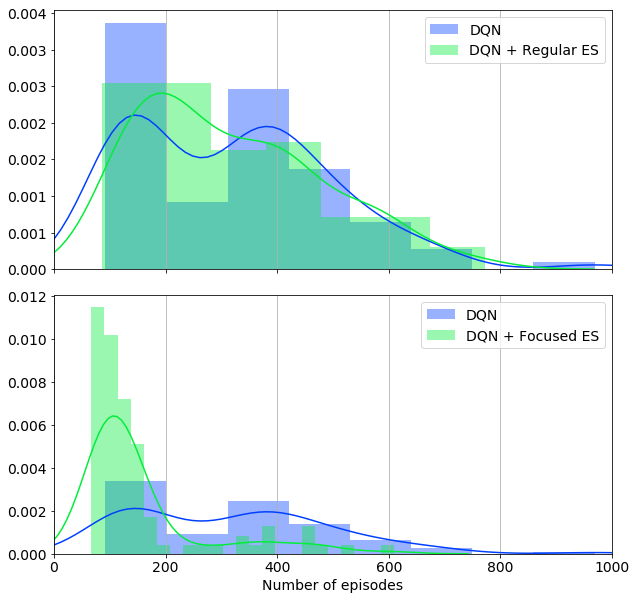

In [23]:
plot_multi(episode_count, (['dqn', 'dqn_sharing'], ['dqn', 'dqn_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti.png', dpi=200, bbox_inches='tight')

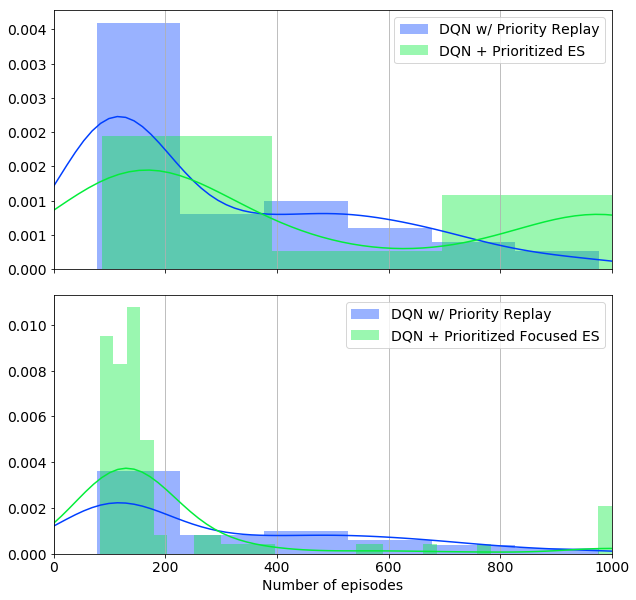

In [24]:
plot_multi(episode_count, (['dqn_prio', 'dqn_prio_sharing'], ['dqn_prio', 'dqn_prio_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti-prio.png', dpi=200, bbox_inches='tight')

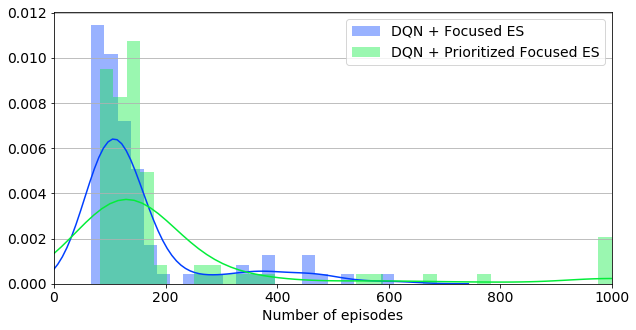

In [25]:
plot_single(episode_count, ['dqn_focus_sharing', 'dqn_prio_focus_sharing'], ['#003FFF', '#03ED3A'])
plt.savefig('multiComparison.png', dpi=200, bbox_inches='tight')

In [26]:
graph = {}

In [27]:
graph['NE Mean'] = []
for k,v in episode_count.items():
    graph['NE Mean'].append(np.mean(v))

graph['NE Deviation'] = []
for k,v in episode_count.items():
    graph['NE Deviation'].append(np.std(v))

In [28]:
graph['Trials Failed'] = []
for k,v in episode_count.items():
    graph['Trials Failed'].append(sorted(v).count(1000))
    

In [29]:
experiments_labels.values()

dict_values(['DQN + Regular ES', 'DQN + Prioritized ES', 'DQN + Prioritized Focused ES', 'DQN + Focused ES', 'DQN', 'DQN w/ Priority Replay'])

In [30]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame.from_dict(graph)
df = df.transpose()
df.columns=experiments_labels.values()
df = df.transpose()
df['NE Mean'] = df['NE Mean'].round(decimals=2)
df['NE Deviation'] = df['NE Deviation'].round(decimals=2)
df['Trials Failed'] = pd.to_numeric(df['Trials Failed'], downcast='integer')
df.style.set_properties(**{'text-align': 'center'})
df = df.sort_values(by='NE Mean')
df.head(10)


,NE Mean,NE Deviation,Trials Failed
DQN + Prioritized ES,154.44,111.92,0
DQN + Focused ES,206.87,214.63,5
DQN + Prioritized Focused ES,300.22,246.05,0
DQN + Regular ES,317.65,176.64,0
DQN w/ Priority Replay,318.19,163.26,0
DQN,459.63,370.57,26


In [31]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  NE Mean &  NE Deviation &  Trials Failed \\
\midrule
DQN + Prioritized ES         &  154.44  &  111.92       &   0            \\
DQN + Focused ES             &  206.87  &  214.63       &   5            \\
DQN + Prioritized Focused ES &  300.22  &  246.05       &   0            \\
DQN + Regular ES             &  317.65  &  176.64       &   0            \\
DQN w/ Priority Replay       &  318.19  &  163.26       &   0            \\
DQN                          &  459.63  &  370.57       &  26            \\
\bottomrule
\end{tabular}



In [ ]:
# add number of episodes failed

In [33]:
def calc_stats(res):
    # get specific variable to compare
    all_values = list(res.items())
    samples = list(combinations(all_values, 2))
    for sample in samples:
        print(sample[0][0], "vs ",  sample[1][0])
        print("\n")
        print(stats.ks_2samp(sample[0][1], sample[1][1]))  
        print("\n")

calc_stats(episode_count)

dqn vs  dqn_focus_sharing


Ks_2sampResult(statistic=0.51, pvalue=3.696390026378737e-12)


dqn vs  dqn_prio


Ks_2sampResult(statistic=0.27, pvalue=0.0010291327972217178)


dqn vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=0.49999999999999994, pvalue=1.0553445530400817e-11)


dqn vs  dqn_prio_sharing


Ks_2sampResult(statistic=0.31999999999999995, pvalue=4.805188219110764e-05)


dqn vs  dqn_sharing


Ks_2sampResult(statistic=0.13, pvalue=0.34388571222170117)


dqn_focus_sharing vs  dqn_prio


Ks_2sampResult(statistic=0.31999999999999995, pvalue=4.805188219110764e-05)


dqn_focus_sharing vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=0.24000000000000005, pvalue=0.005042695196242097)


dqn_focus_sharing vs  dqn_prio_sharing


Ks_2sampResult(statistic=0.45999999999999996, pvalue=5.696906870833783e-10)


dqn_focus_sharing vs  dqn_sharing


Ks_2sampResult(statistic=0.6200000000000001, pvalue=9.131398759610072e-18)


dqn_prio vs  dqn_prio_focus_sharing


Ks_2sampResult(statist